In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: To ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [8]:
# Load dataset
df = pd.read_csv("employee.csv") 

# Display the first few rows
df.head()


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [10]:
# Clean column names: remove leading/trailing spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# Show updated column names
print(df.columns)


Index(['company', 'age', 'salary', 'place', 'country', 'gender'], dtype='object')


In [12]:
# Replace 0 in 'age' column with NaN
df['age'] = df['age'].replace(0, np.nan)

# Show how many missing values are in each column
df.isnull().sum()


company     8
age        24
salary     24
place      14
country     0
gender      0
dtype: int64

In [14]:
# Fill missing values
df['company'].fillna(df['company'].mode()[0], inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['salary'].fillna(df['salary'].mean(), inplace=True)
df['place'].fillna(df['place'].mode()[0], inplace=True)

# Confirm all missing values are handled
df.isnull().sum()


company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64

In [16]:
# Check how many duplicate rows exist
print("Duplicate rows before removal:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm removal
print("Duplicate rows after removal:", df.duplicated().sum())


Duplicate rows before removal: 4
Duplicate rows after removal: 0


In [18]:
# Calculate IQR for salary
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)]
print(f"Number of salary outliers: {len(outliers)}")
outliers.head()


Number of salary outliers: 0


,company,age,salary,place,country,gender


In [20]:
# Filter data where age > 40 and salary < 5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]

# Show filtered rows
filtered_df.head()


,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0


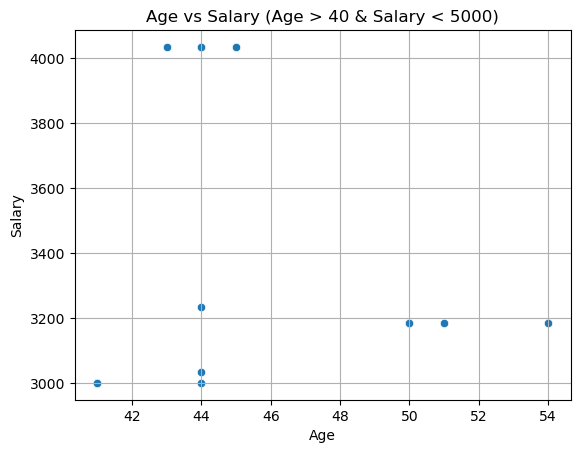

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Age vs Salary
sns.scatterplot(data=filtered_df, x='age', y='salary')
plt.title("Age vs Salary (Age > 40 & Salary < 5000)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


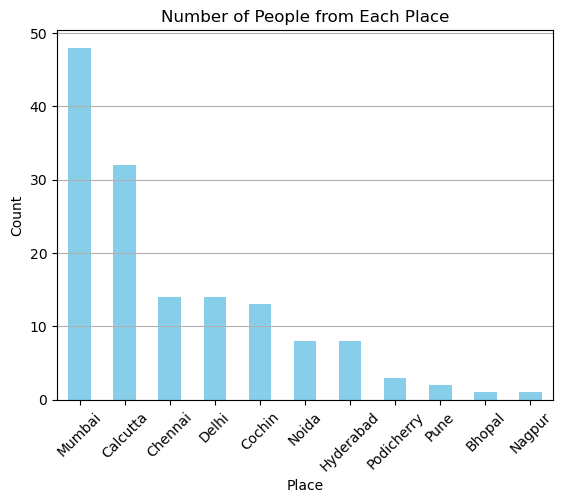

In [26]:
# Count the number of people from each place
place_counts = df['place'].value_counts()

# Plot as bar chart
place_counts.plot(kind='bar', color='skyblue')
plt.title("Number of People from Each Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



In [28]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for gender
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# One-Hot Encoding for other categorical columns
df_encoded = pd.get_dummies(df, columns=['company', 'place', 'country'])

# Show encoded dataframe
df_encoded.head()


,age,salary,gender,company_CTS,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Bhopal,...,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune,country_India
0,20.0,5312.467742,0,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,30.0,5312.467742,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.000000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.000000,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.000000,0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


,age,salary,gender,company_CTS,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Bhopal,...,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune,country_India
0,20.0,5312.467742,0,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,30.0,5312.467742,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.000000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.000000,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.000000,0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select only numeric columns for scaling
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Create copies for each scaling method
standard_scaled_df = df_encoded.copy()
minmax_scaled_df = df_encoded.copy()

# Apply StandardScaler
scaler_std = StandardScaler()
standard_scaled_df[numeric_cols] = scaler_std.fit_transform(standard_scaled_df[numeric_cols])

# Apply MinMaxScaler
scaler_mm = MinMaxScaler()
minmax_scaled_df[numeric_cols] = scaler_mm.fit_transform(minmax_scaled_df[numeric_cols])

# Display first few rows of each
print("Standard Scaled Data:")
display(standard_scaled_df.head())

print("MinMax Scaled Data:")
display(minmax_scaled_df.head())


Standard Scaled Data:


,age,salary,gender,company_CTS,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Bhopal,...,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune,country_India
0,-1.484676,0.010324,-0.534522,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,-0.267174,0.010324,-0.534522,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.341577,-1.266072,-0.534522,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.950328,-0.969479,-0.534522,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,-1.119426,-0.545775,-0.534522,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


MinMax Scaled Data:


,age,salary,gender,company_CTS,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Bhopal,...,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune,country_India
0,0.081081,0.480650,0.0,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,0.351351,0.480650,0.0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.486486,0.137817,0.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.621622,0.217480,0.0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0.162162,0.331285,0.0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
